# Phase 2 [EDL - Data analysis phase ]

In [ ]:
# 1.Open new Jupyter notebook

In [7]:
# 2.Import required libraries

import csv
import numpy as np
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [9]:
# 3.Read your cleaned csv which you did in phase 1

video_games = pd.read_csv("video_game_clean_format.csv")
df = pd.DataFrame(video_games)

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [10]:
# 4.Shape the data

df.shape

(6825, 16)

In [12]:
# 5.Show first five records

df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
6,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
7,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
8,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
9,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [13]:
# 6.Show all columns of the dataframe

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [15]:
# 7.Show last 5 five rows

df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6820,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.0,0.0,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
6824,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


In [16]:
# 8.Describe the data.

df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


<AxesSubplot:xlabel='Year_of_Release'>

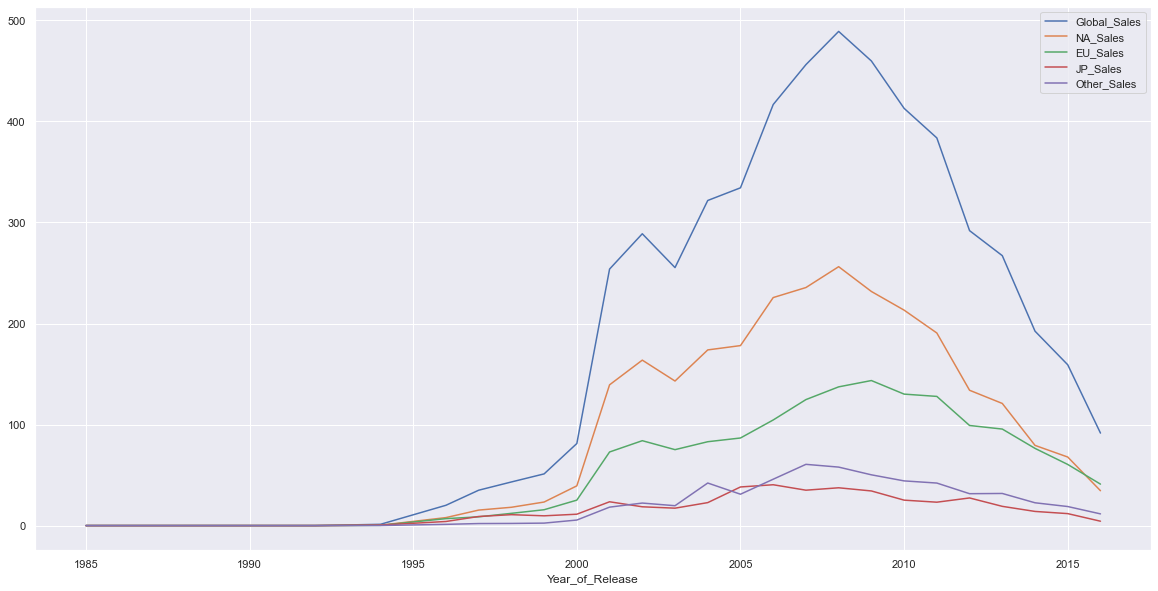

In [29]:
# 9.Group the sales data of each region on Year_of_Release and plot the same 
# (It should show which region sales was at peak on which year of release)

sales_data_year_release = df.groupby('Year_of_Release')['Global_Sales'].sum()

sales_data_NA = df.groupby('Year_of_Release')['NA_Sales'].sum()
sales_data_JP = df.groupby('Year_of_Release')['JP_Sales'].sum()
sales_data_EU = df.groupby('Year_of_Release')['EU_Sales'].sum()
sales_data_Other = df.groupby('Year_of_Release')['Other_Sales'].sum()

sales_data_All = df.groupby('Year_of_Release')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

sales_data_All.plot()

<AxesSubplot:xlabel='Genre'>

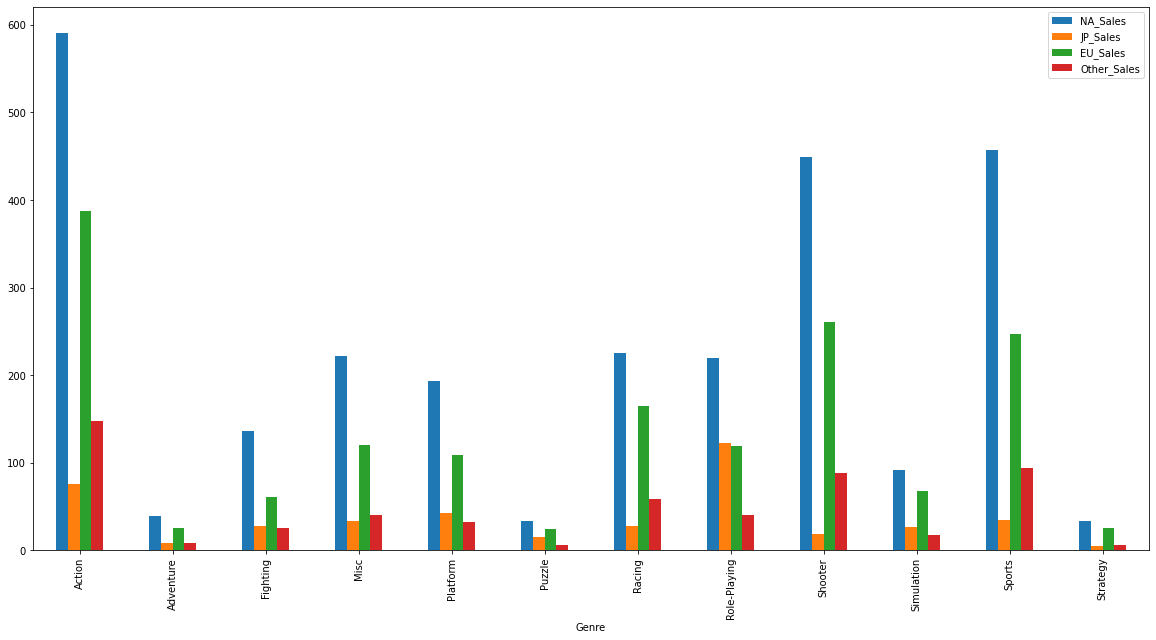

In [18]:
# 10.Group North American, Japan, European & Other region sales data as per Genre and plot it 
# (It should show highest of region according to game category , ex- NA_Sales is highest in Adventure category , 
# plot kind should be bar)

# Genre
group_region = df.groupby('Genre')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
group_region.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Platform'>

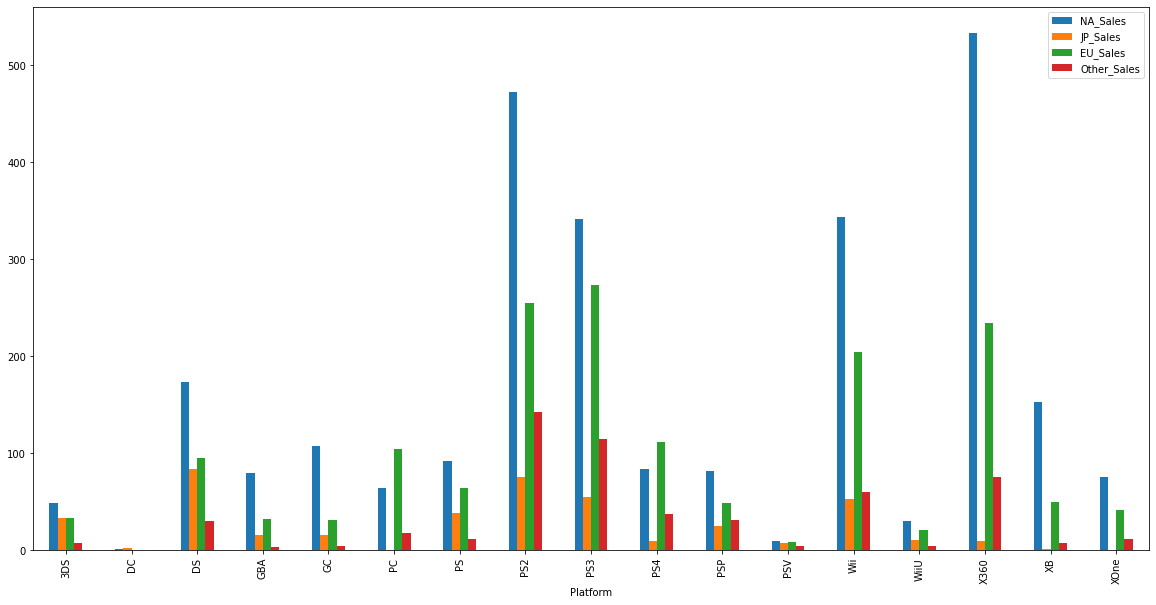

In [19]:
# 11.Group North American, Japan, European & Other region sales data as per Platform and plot it 
# (Should show sales as per "Platform genre" , plot kind should be bar )

# Platform
group_region = df.groupby('Platform')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
group_region.plot(kind='bar',figsize=(20,10))


<AxesSubplot:title={'center':'NA_Sales'}, xlabel='Platform'>

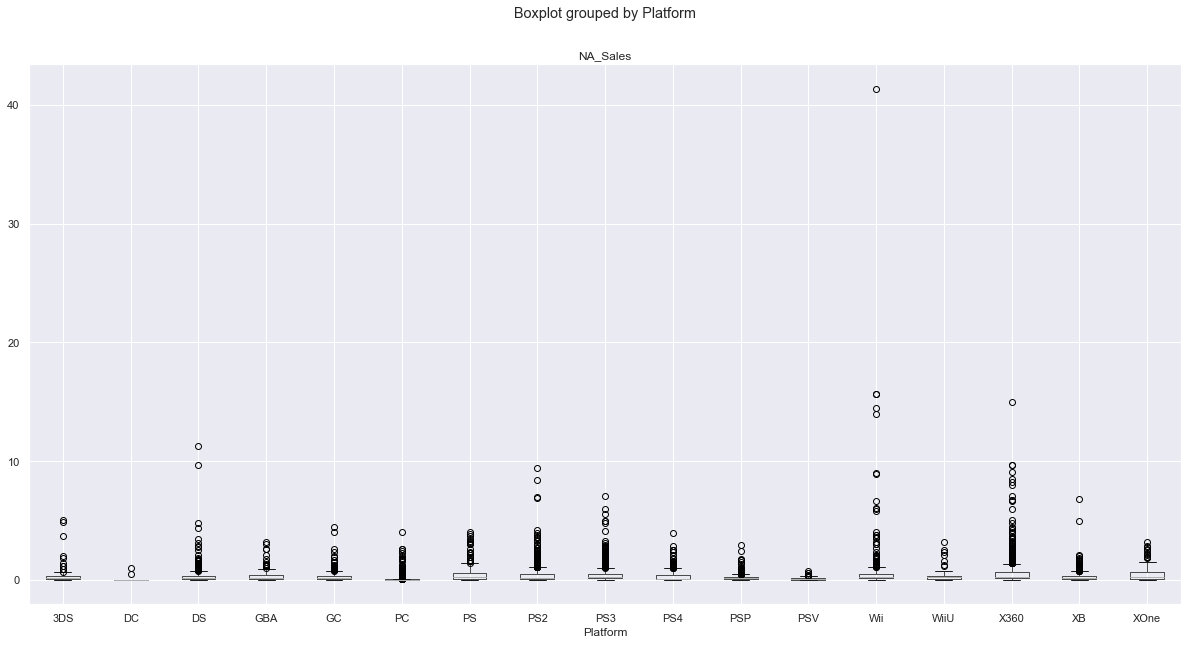

In [30]:
# 12.Plot the Sales in all regions as per Platform , you need to create a boxplot for that which will show the distribution of sales as per platform

# 'Global_Sales','NA_Sales','JP_Sales','EU_Sales','Other_Sales'
# Sales data has many outliers, making the Boxplot difficult accurately graph the sales
# put aggregate with mean and assign different object with seaborn
df.boxplot(column='NA_Sales',by='Platform',figsize=(20,10))

<AxesSubplot:xlabel='Genre', ylabel='count'>

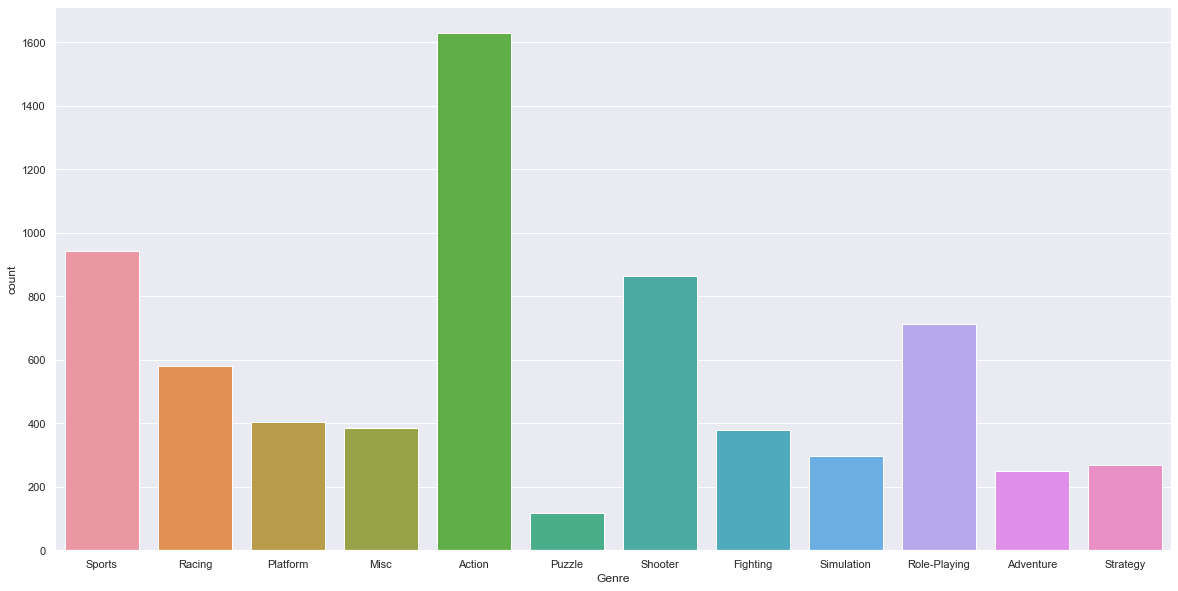

In [23]:
# 13.Find out which Genre games are sold in highest numbers (create a countplot of seaborn which could do that)

sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Genre',data=df)

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

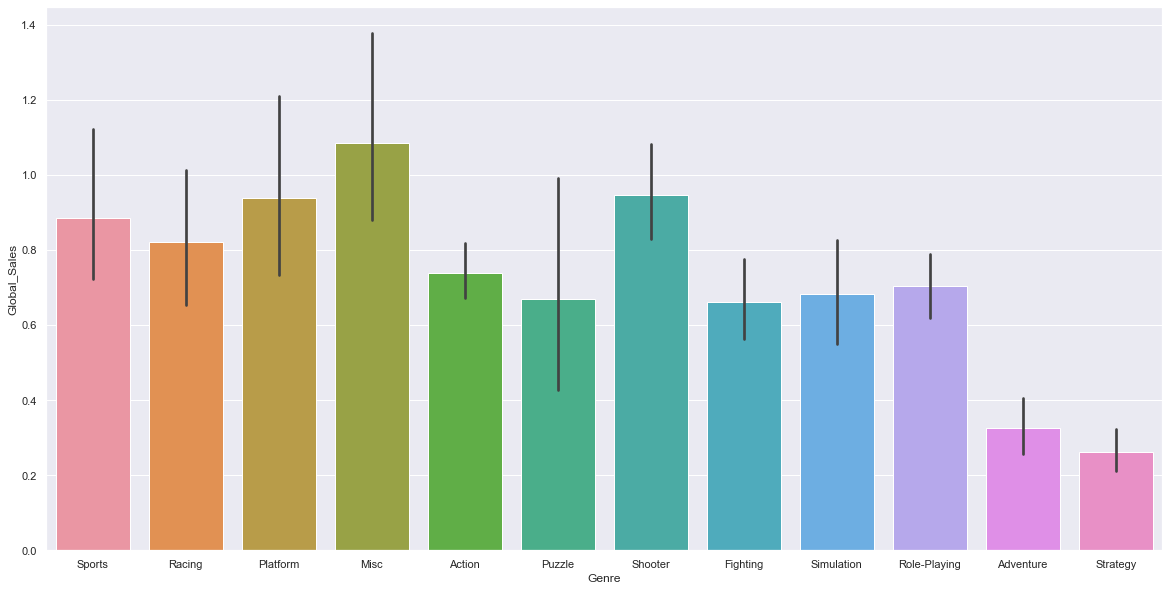

In [24]:
# 14.Try to find out global sales as per Genre ,(create a barplot of seaborn for that)

sns.barplot(x='Genre',y='Global_Sales',data=df)